In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [131]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

# Visualization

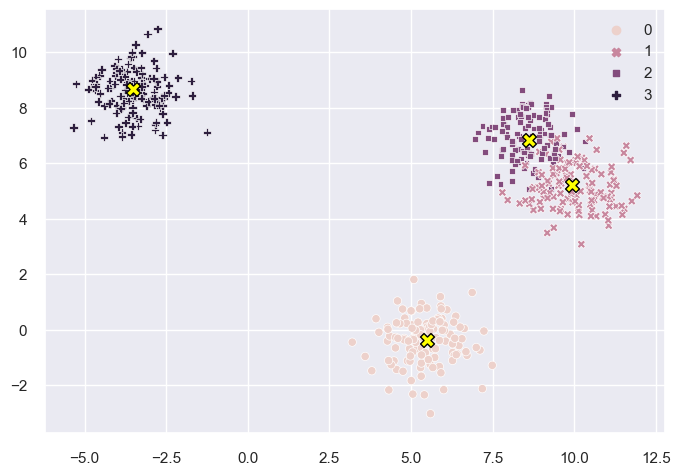

In [132]:
ax = plt.gca()
def plot_blobs(X, y, c, ax):
    plot1 = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, legend=True, style=y, ax=ax)
    plot2 = ax.scatter(x=c[:,0], y=c[:,1], color='yellow', edgecolors='black', s=100, marker="X")
    sns.set_style()
    return plot1, plot2
plot_blobs(X,y,c,ax)
plt.show()

# KMeans

In [133]:
model = KMeans(n_clusters=4, n_init='auto')
model.fit(X)
y_pred = model.predict(X)

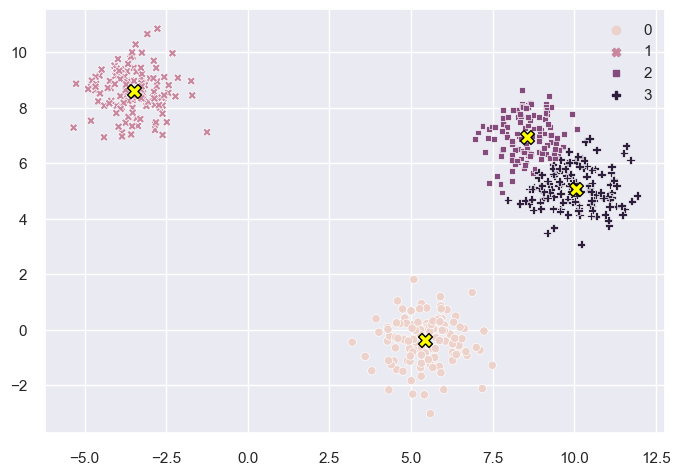

In [134]:
ax = plt.gca()
plot_blobs(X,y_pred, model.cluster_centers_, ax)
plt.show()

# Evaluación

## Elbow method

In [135]:
from scipy.spatial import distance
np.sum(np.min(distance.cdist(X, model.cluster_centers_), axis=1) ** 2)

572.1776109527018

In [136]:
model.inertia_

572.1776109527017

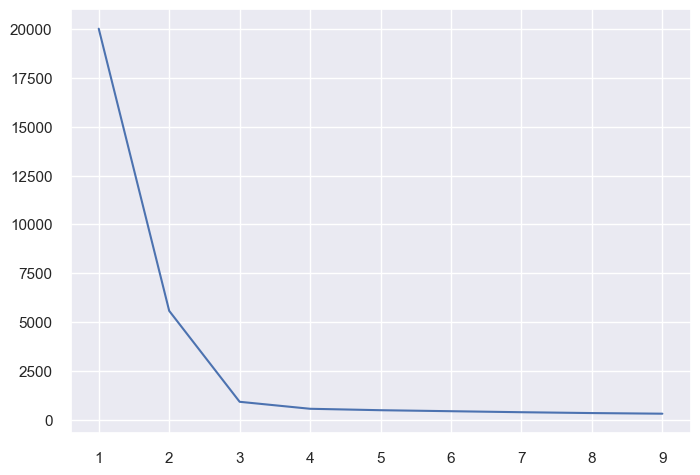

In [137]:
inertia = []
range_ = range(1,10)
for k in range_:
    kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range_, inertia)
plt.show()

# Silhoutte score

$$ s(i) = \frac{b_i - a_i}{\max(b_i, a_i)}  $$

Donde:
- $a$: El promedio de las disimilitudes (distancia euclidiana) respecto a las demás observaciones pertenecientes a su mismo clúster (vecinos).
- $b$: El mínimo promedio del punto respecto a los clústers que no pertenecen al mismo.

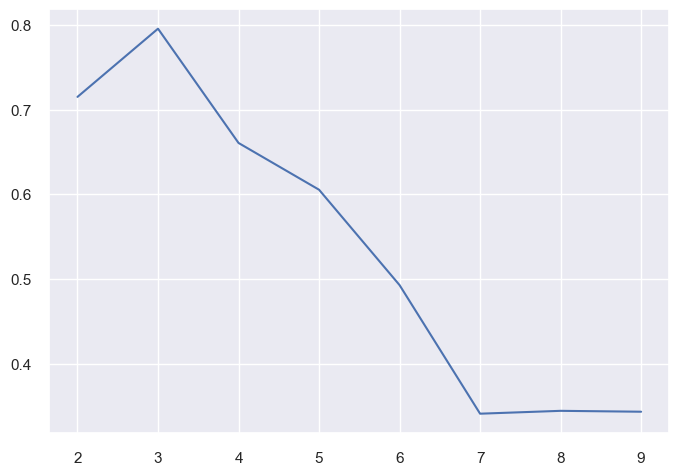

In [138]:
scores = []
range_ = range(2,10)
for k in range_:
    kmeans = KMeans(n_clusters=k, n_init=10).fit(X)
    pred = kmeans.predict(X)
    scores.append(silhouette_score(X=X, labels=pred))
plt.plot(range_, scores)
plt.show()

In [140]:
n_clusters = np.argmax(scores) + 2
model = KMeans(n_clusters=n_clusters, n_init=10).fit(X)

SilhouetteVisualizer(ax=<AxesSubplot: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, n_init=10))

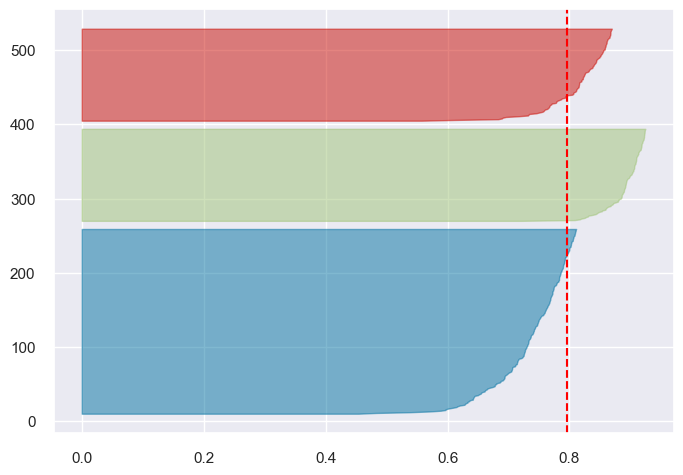

In [141]:
viz = SilhouetteVisualizer(model, colors='yellowbrick')
viz.fit(X)